In [142]:
using Plots, ROCAnalysis, GLM, MLBase, Lathe, Distributions, LaTeXStrings, CSV, DataFrames, StatsBase, Missings
using IJulia: readprompt

Q1

In [16]:
x = [i for i in 1:100]
f= x->x*2 + randn()
y = f.(x)

100-element Vector{Float64}:
   3.686632542517893
   2.8826959953929903
   5.806855459519275
   8.48767398540714
  10.759567170591456
  11.545387222558663
  14.440415396818572
  14.306297259495924
  16.211725214748594
  20.66597251508455
  21.676605155598025
  22.988115382220716
  26.582307474434604
   ⋮
 178.55334254691917
 181.40926585489683
 181.42690784812208
 184.95897386542288
 187.7583930722653
 188.9730832555367
 190.79135866724062
 192.333870348304
 192.7944305826697
 196.35334937759413
 198.210198716993
 200.1050278121841

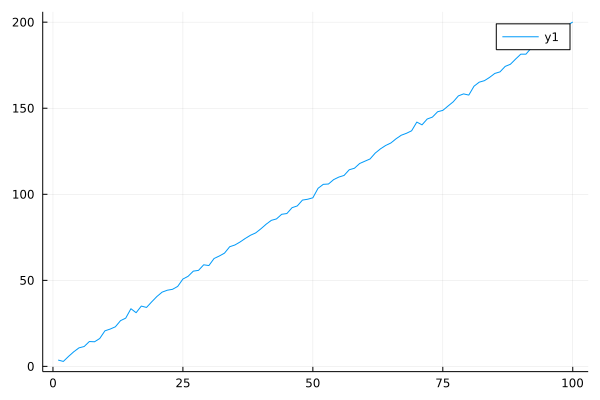

In [17]:
plot(x,y)

Q2

In [62]:
function foctorial(n)
    if n % 1 != 0 || n<0
        println("your input variable is not valid.")
        return 
    elseif n == 0
        return 1
    else
        a = [i for i in 1:n]
        res = prod(a)
        return res
    end
end



foctorial (generic function with 1 method)

In [63]:
input = parse(Float64, readprompt("write the number!"))
foctorial(input)

362880.0

Q3

In [148]:
df = CSV.read("dataset.csv", DataFrame)

,interviewee ID,Region,Sex,Age,Car accident
,Int64,String1,String7,Float64?,Int64
1,1,C,female,18.0,0
2,2,C,female,18.0,0
3,3,B,male,18.0,0
4,4,C,male,18.0,0
5,5,C,male,18.0,1
6,6,B,male,18.0,0
7,7,A,female,18.0,1
8,8,C,male,18.0,0
9,9,B,male,18.0,0


In [149]:
select!(df, Not([:Sex, :Region]))

,interviewee ID,Age,Car accident
,Int64,Float64?,Int64
1,1,18.0,0
2,2,18.0,0
3,3,18.0,0
4,4,18.0,0
5,5,18.0,1
6,6,18.0,0
7,7,18.0,1
8,8,18.0,0
9,9,18.0,0


Q3.1

In [150]:
sample_rows = sample(1:nrow(df), floor(Int, 85*764/100), replace = false)
train_set = df[sample_rows, :]

,interviewee ID,Age,Car accident
,Int64,Float64?,Int64
1,188,25.0,0
2,609,missing,0
3,64,20.0,1
4,695,missing,0
5,203,26.0,0
6,34,19.0,1
7,11,18.0,0
8,446,40.0,1
9,677,missing,0


In [151]:
test_rows = setdiff(1:nrow(df), sample_rows)
test_set = df[test_rows, :]

,interviewee ID,Age,Car accident
,Int64,Float64?,Int64
1,2,18.0,0
2,16,18.0,0
3,28,19.0,1
4,36,19.0,0
5,44,19.0,0
6,49,19.0,0
7,56,20.0,0
8,68,21.0,0
9,69,21.0,0


Q3.2

In [108]:
typeof(missing)

Missing

In [109]:
findall(x->typeof(x)==Missing, df.Age)

177-element Vector{Int64}:
 588
 589
 590
 591
 592
 593
 594
 595
 596
 597
 598
 599
 600
   ⋮
 753
 754
 755
 756
 757
 758
 759
 760
 761
 762
 763
 764

In [127]:
avg = mean(df.Age[1:587])

32.75127768313458

In [132]:
replace!(df.Age,missing => avg)

764-element SentinelArrays.SentinelVector{Float64, Float64, Missing, Vector{Float64}}:
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
 18.0
  ⋮
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458
 32.75127768313458

In [134]:
names(df)

5-element Vector{String}:
 "interviewee ID"
 "Region"
 "Sex"
 "Age"
 "Car accident"

In [152]:
fm = @formula(Car accident ~ interviewee ID + Age)
logit = glm(fm, train_set, Binomial(), ProbitLink())

LoadError: syntax: missing comma or ) in argument list

In [153]:
prediction = predict(logit,test_set)

LoadError: UndefVarError: logit not defined

Q4

If α is too large, gradiant decent will overshoot the minumum and it may diverge.

Q5

 the iteration needed for the conjugate gradient algorithm to find the solution is the same as the dimension of matrix M. That’s why we don’t need to safeguard our algorithm from infinite loop. In fact, if M has only r distinct eigenvalues, then the Conjugate Gradient iteration will terminate at the solution in at most r iterations.